# Step 1: Installation and Setup

In [ ]:
# Installing TensorFlow
%pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 105.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf

In [ ]:
print (tf.__version__)

2.20.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle  to Colab

In [ ]:
# Installing Kaggle API
!pip install -q kaggle

In [ ]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [ ]:
# disable API key
! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                        title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
yashdevladdha/uber-ride-analytics-dashboard                Uber Data Analytics Dashboard                         17324552  2025-08-08 11:13:42.920000          38164        867  1.0              
mdsultanulislamovi/student-stress-monitoring-datasets      Student Stress Monitoring Datasets                       24336  2025-07-24 16:30:01.617000          21029        368  1.0              
ikramshah512/amazon-products-sales-dataset-42k-items-2025  Amazon Products Sales Dataset 42K+ Items - 2025        8086390  2025-09-01 02:31:27.053000           1264         25  1.0              
vikasjigupta786/customer-

In [ ]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 52% 113M/218M [00:00<00:00, 1.18GB/s]
100% 218M/218M [00:00<00:00, 1.18GB/s]


In [ ]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [ ]:
# Creating an object (Initilizing CNN)
model = tf.keras.models.Sequential()

In [ ]:
# Adding first CCN layer
# 1) filters (kernel/feature detectors) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')
])

In [ ]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [ ]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [ ]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Adding output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [ ]:
# rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
len(training_set), len(test_set)

(401, 102)

In [ ]:
len(training_set) *20, len(test_set)*20

(8020, 2040)

In [ ]:
test_set.batch_size

20

In [ ]:
history = model.fit(
    training_set,
    steps_per_epoch=401,
    epochs=20,
    validation_data=test_set,
    validation_steps=102
)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 26s 61ms/step - accuracy: 0.5385 - loss: 0.6904 - val_accuracy: 0.5887 - val_loss: 0.6626
Epoch 2/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.6372 - loss: 0.6405 - val_accuracy: 0.6851 - val_loss: 0.6069
Epoch 3/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.6845 - loss: 0.5923 - val_accuracy: 0.7311 - val_loss: 0.5532
Epoch 4/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7071 - loss: 0.5594 - val_accuracy: 0.7296 - val_loss: 0.5371
Epoch 5/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.7435 - loss: 0.5157 - val_accuracy: 0.7301 - val_loss: 0.5443
Epoch 6/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.7692 - loss: 0.4862 - val_accuracy: 0.7499 - val_loss: 0.5210
Epoch 7/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 59ms/step - accuracy: 0.7762 - loss: 0.4668 - val_accuracy: 0.7326 - val_loss: 0.5430
Epoch 8/20
401/401 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step - accuracy: 0.7989 - loss: 0.4272 - val_accurac

# Step 5: Plotting the learning curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

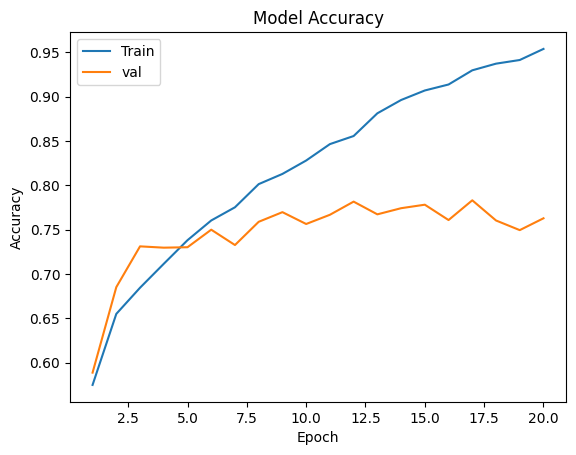

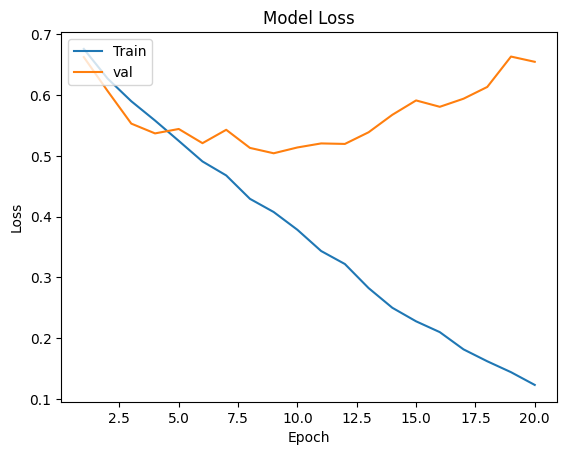

In [ ]:
learning_curve(history, 20)